# Probability generating function solution

Master equations are simply system of differential equations and can therefore be solved by the usual techniques. When looking for a steady-state solution, we can simply set all time derivatives to zero and try to solve for the occupation numbers at equilibrium. These system often contain a large or even infinite number of equations, but for most model their structure should be regular. This allows us to write recursion formula for the equilibrium values. Recursion that, if lucky or creative enough, we could solve explicitly. Or we could be a bit more systematic and attempt this approach using **probability generating functions**.

Consider the following generating function,

$$
G(x,t) = \sum _{n=-\infty}^{\infty}P_n(t)x^n
$$

which is defined over all integer values of $n$. $G(x,t)$ is a probability generating functions since its coefficients $P_n(t)$ are occupation numbers, and therefore positive coefficients, such that $G(1,t) = 1$ for all time $t$.

Our goal here will therefore be to rewrite master equations (large systems of differential equations) in terms of a single partial differential equation for $G(x,t$).

## Solution to the birth-death process

Consider the [birth–death process](https://en.wikipedia.org/wiki/Birth%E2%80%93death_process) with a fixed constant birth rate $\mu$ for particles and a fixed death rate $\nu$ for all active particles. This is a system we also tackle with numerical integration, which means we know it contains a steady-state distribution over all occupation numbers. For this process, our master equations are defined as follows for $n\geq 0$,

$$
\begin{align}
\frac{d}{dt}P_n(t) &= -\mu P_n(t) + (n+1)\nu P_{n+1}(t) \quad \textrm{for n=0}\\
\frac{d}{dt}P_n(t) &= -(\mu + n\nu)P_n(t) + (n+1)\nu P_{n+1}(t) + \mu P_{n-1}(t) \quad \textrm{for n>0}\\
\end{align}
$$

Equivalently, we can use a equation for all $n$ and simply state that $P_{n<0}(t) = 0$:

$$
\frac{d}{dt}P_n(t) = -(\mu + n\nu)P_n(t) + (n+1)\nu P_{n+1}(t) + \mu P_{n-1}(t)
$$

The method of **_generatingfunctionology_** {cite}`wilf2005generatingfunctionology` is to multiply both sides of such an equation by $x^n$ and sum over all values of $n$. This gives us

$$
\begin{align}
\sum_{n=-\infty}^{\infty} \frac{d}{dt}P_n(t) x^n &= \sum _{n=-\infty}^{\infty} \left[-\mu P_n(t)x^n - n\nu P_n(t)x^n + (n+1)\nu P_{n+1}(t)x^n + \mu P_{n-1}(t)x^n\right] \\
\frac{\partial}{\partial t} G(x,t) & = -\mu G(x,t) - x\nu\frac{\partial}{\partial x}G(x,t) + \nu\frac{\partial}{\partial x}G(x,t) + x\mu G(x,t) \\
\frac{\partial}{\partial t} G(x,t) & = (1-x)\left[\nu \frac{\partial}{\partial x}G(x,t) -\mu G(x,t)\right]
\end{align}
$$

In some cases, partial differential equations of this type can be solved explicitly using the method of the characteristics. In practice however, we tend to use this approach to solve for the steady-state value $G(x) = \lim_{t\rightarrow\infty} G(x,t)$ where we assume that the temporal derivative of $G(x,t)$ is equal to zero. We therefore have

$$
\begin{align}
0 &= (1-x)\left[\nu\frac{d}{dx}G(x) - \mu G(x)\right] \\
\frac{d}{dx}G(x) &= \frac{\mu}{\nu}G(x)
\end{align}
$$

This is a simple case where, recalling our lovely calculus courses, we get

$$
G(x) = \exp\left(\frac{\mu}{\nu}x + C\right)
$$

where the constant of integration can be identified through our normalization condition $G(1) = 1$ such that

$$
G(x) = \exp\left(\frac{\mu}{\nu}(x-1)\right)
$$

## Comparison with numerical integration

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_12685/1791347684.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


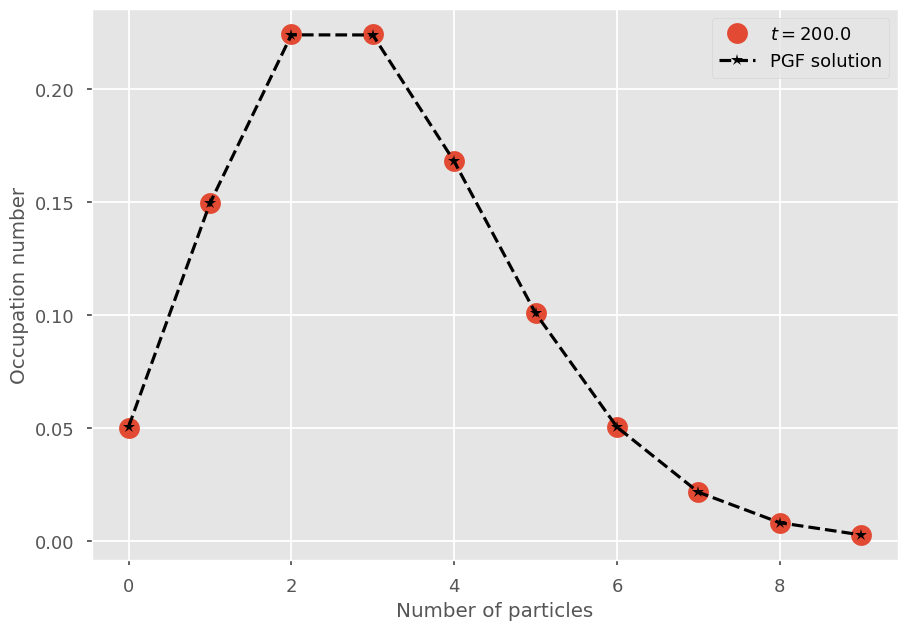

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

# We will use the odeint routine
from scipy.integrate import odeint

# Master Equations
def J(x, t, mu, nu):    
    dx = 0*x
    for n in range(len(x)):
        if n==0: #for first state
            dx[0] = - mu*x[0] + nu*x[1]
        elif n==len(x)-1: #for last state
            dx[n] = -(nu*n)*x[n] + mu*x[n-1]
        else: #all other states
            dx[n] = -(mu+nu*n)*x[n] + nu*(n+1)*x[n+1] + mu*x[n-1]

    return dx

# Time of observations
t_length = 200
t_steps = 10
t_vec = np.linspace(0, t_length, t_steps)

# Initial conditions
nb_of_states = 10
x_0 = np.zeros(nb_of_states)
x_0[0] = 1

# Parameters
mu = 0.3
nu = 0.1

# Numerical integration
G = lambda x, t: J(x, t, mu, nu)
x_path = odeint(G, x_0, t_vec)

# PGF solution
G = lambda x: np.exp((mu/nu)*(x-1))
G = np.vectorize(G)
N = nb_of_states
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)
pn = abs(np.fft.fft(G(c))/N)

# Plot
plt.plot(range(nb_of_states),x_path[-1], marker="o", lw=0, ms=15, label=fr"$t = {t_vec[-1]}$")
plt.plot(range(nb_of_states),pn, marker="*", ls='--', color='k',label=r'PGF solution')
plt.legend()
plt.ylabel('Occupation number')
plt.xlabel('Number of particles')
plt.show()